SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.credit-card-information`

WHERE MOD(CAST(CUST_ID AS INT64), 2) = 0


##1.INTRODUCTION

NAMA : KEVIN NUR KURNIA

PROGRAM : FTDS BATCH 4

Obejective

Membuat model clustering dengan metode k=means untuk melakukan Customer Segmentation guna peningkatan kualitas profiling untuk penggunaan dalam marketing yang lebih efektif.

Problem statement

Bank ingin melakukan segmentasi perilaku penggunaan kartu kredit menjadi kelompok - kelompok yang memiliki penggunaan kartu kredit yang serupa. Dengan adanya profiling yang baik diharapkan bank bisa melakukan pemasaran yang lebih tepat sasaran.

##2.IMPORT LIBRARY

In [ ]:
#install pip untuk wisorizor
!pip install feature_engine
from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
import matplotlib.cm as cm
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings(action='ignore')
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import silhouette_score,silhouette_samples
np.random.seed(42)
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

##3.LOAD DATA

In [ ]:
df= pd.read_csv('/content/Untitled Folder/h8dsft_P1G4_kevinnk.csv')

In [ ]:
#sample data_inference
df_sample = df.sample(n=30, random_state=42)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [ ]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [ ]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


In [ ]:
#membuat variable num_col dan cat_col untuk dipisahkan dan diketahui informasi datanya
num_col = df.describe().columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

Tidak Terdapat kolom yang memiliki Teks/Categorical

In [ ]:
num_col

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [ ]:
cat_col

[]

In [ ]:
#mengecek nilai unik pada fitur
df.nunique()

CUST_ID                             4475
BALANCE                             4439
BALANCE_FREQUENCY                     42
PURCHASES                           3218
ONEOFF_PURCHASES                    2073
INSTALLMENTS_PURCHASES              2357
CASH_ADVANCE                        2155
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         153
PAYMENTS                            4350
MINIMUM_PAYMENTS                    4317
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
#mengecek tipe data pada fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [ ]:
#mengecek missing value pada kolom
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#melakukan data cleaning missing value
df_clean = df.dropna(axis=0)

In [ ]:
#cek kembali apakah sudah bersih missing value
df_clean.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
#presentase missing value padas data sekitar 3.5%
(313/8950)*100


3.4972067039106145

In [ ]:
#mengecek jumlah row dan kolom
df.shape

(4475, 18)

In [ ]:
df.duplicated().sum()

0

DATA LOADING OVERVIEW

- Mayoritas data adalah Numerical 

- Terdapat 313 missing value pada kolom minimun payment

- Terdapat 8950 rows dan 18 kolom

- 0 data duplikat

##4.EXPLORATORY DATA ANALYSIS


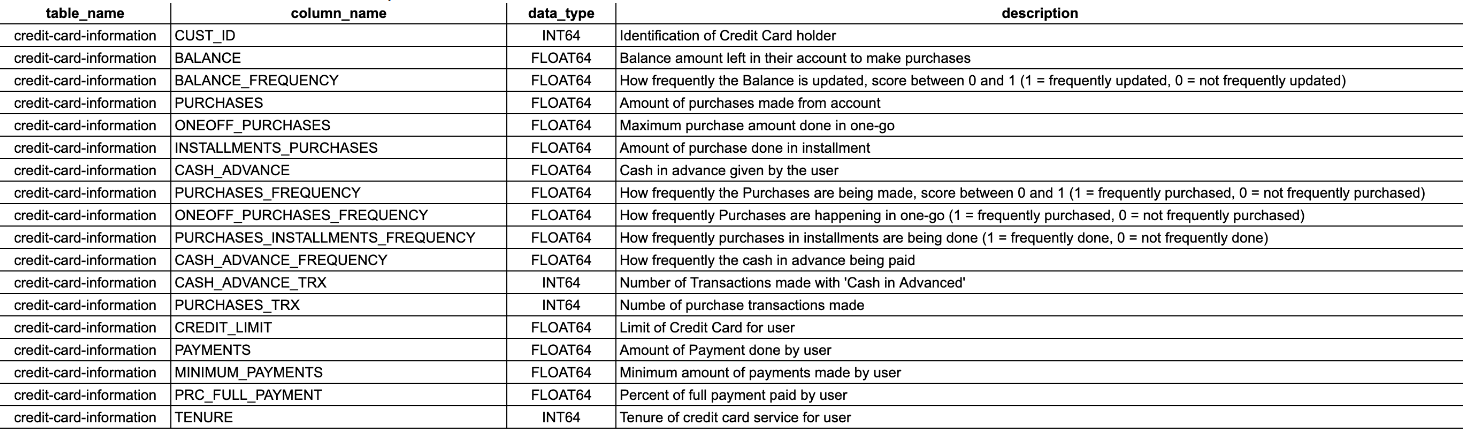


In [ ]:
#melakukan pengecekan informasi basic pada data
df_clean.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000
mean,4474.638554,1600.114511,0.895236,1025.274057,600.770438,424.888909,986.980658,0.495675,0.205447,0.369805,0.136236,3.252549,14.801900,4524.431479,1785.801612,854.624165,0.162997,11.531511
std,2589.259871,2107.347942,0.206730,2241.729131,1690.105736,940.627467,2159.134558,0.399564,0.299252,0.398217,0.200511,6.576772,24.473182,3688.856008,2997.093142,2306.642962,0.299700,1.324580
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,4.841543,0.037744,0.000000,6.000000
25%,2241.500000,152.877191,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,427.905948,169.878606,0.000000,12.000000
50%,4475.000000,916.693628,1.000000,379.300000,35.955000,95.845000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,874.442322,309.983200,0.000000,12.000000
75%,6712.500000,2112.447004,1.000000,1149.940000,600.000000,498.592500,1110.248526,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1954.888216,830.656813,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


Mengetahui Kolom Numerik

In [ ]:
num_col

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

Tidak terdapat kolom kategorikal

In [ ]:
cat_col

[]

In [ ]:
df_clean[num_col]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
5,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
7,4680,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


##4.1 CHECKING KORELASI ANTAR FITUR

<Figure size 1440x1080 with 0 Axes>

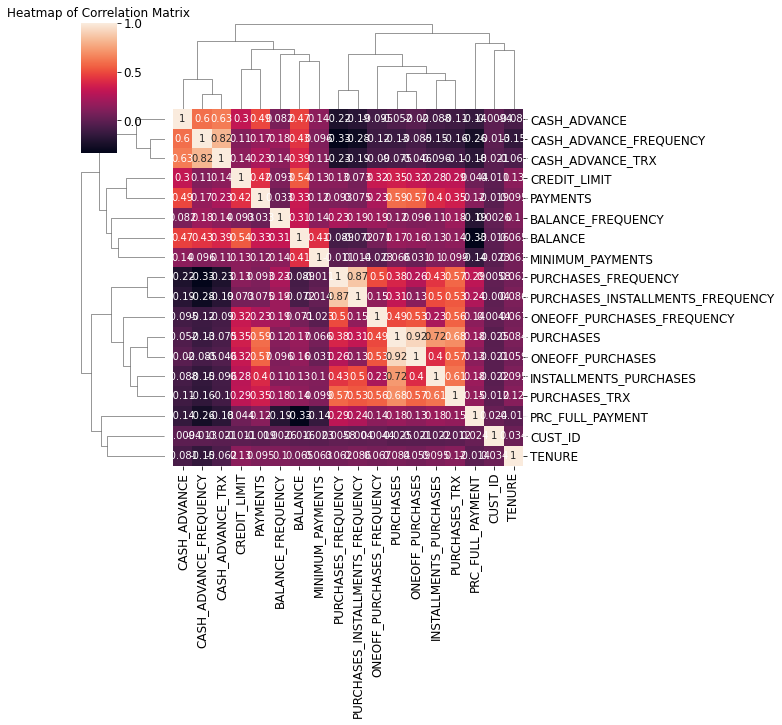

In [ ]:
import seaborn as sns

# Create a heat map of the correlation matrix
corr = df_clean.corr()
plt.figure(figsize=(20,15)) 
sns.clustermap(corr, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# Get the top 10 highest correlation values
top_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()[:10]
print(top_corr)


CUST_ID                 CUST_ID                             1.000000
PURCHASES               ONEOFF_PURCHASES                    0.923381
PURCHASES_FREQUENCY     PURCHASES_INSTALLMENTS_FREQUENCY    0.866065
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX                    0.815734
INSTALLMENTS_PURCHASES  PURCHASES                           0.723999
PURCHASES               PURCHASES_TRX                       0.683719
CASH_ADVANCE_TRX        CASH_ADVANCE                        0.633093
PURCHASES_TRX           INSTALLMENTS_PURCHASES              0.613656
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE                        0.597564
PURCHASES               PAYMENTS                            0.593852
dtype: float64


##4.2 DATA FREQUENCY DISTRIBUTION

Terlihat bahwa sebaran data tidak merata yang berarti berkumungkinan memiliki outliers

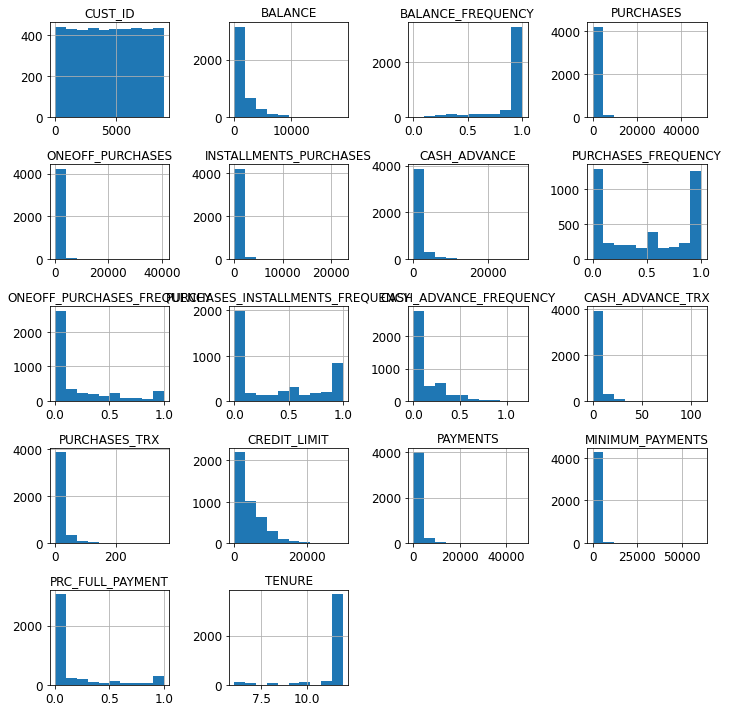

In [ ]:
df_clean[['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']].hist(figsize=(10,10))

plt.tight_layout()

MULTIVOLINEARITY CHECKING

VIF

- Mengecek jumlah data yang vif

- Melihat apalah ada kesamaan informasi dengan fitur yang satu dengan fitur yang lain.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_clean = df.dropna(axis=0)
calc_vif(df_clean)

,variables,VIF
0,CUST_ID,3.936522
1,BALANCE,4.131947
2,BALANCE_FREQUENCY,23.506728
3,PURCHASES,63643.573719
4,ONEOFF_PURCHASES,33697.296506
5,INSTALLMENTS_PURCHASES,11161.761886
6,CASH_ADVANCE,3.520326
7,PURCHASES_FREQUENCY,26.617106
8,ONEOFF_PURCHASES_FREQUENCY,5.779586
9,PURCHASES_INSTALLMENTS_FREQUENCY,17.587674


Nilai VIF Dibawah 5 :

- CUST_ID
- BALANCE
- CASH ADVANCE
- CASH ADVANCE FREQUENCY
- CASH ADVANCE_TRX
- PURCHASE_TRX
- CREDIT_LIMIT
- PAYMENTS
- MINIMUM_PAYMENT
- PRC_FULL_PAYMENT

Nilai VIF Diatas 5 :
- BALANCE_FREQUENCY
- Purchases
- ONEOFF_PURCHASE
- INSTALLMENT_PURCHASE
- PURCHASES_FREQUENCY
- PURCHASES_INSTALLMENTS_FREQUENCY
- TENURE

Dengan adanya feature yang memiliki nilai multicolinearity yang tinggi kita perlu melakukan PCA yaitu mengurangi dimensi pada data sehingga mengurangi noise agar machine learning belajar dengan baik.

##5.PREPROCESS

##5.1 HANDLING OUTLIER

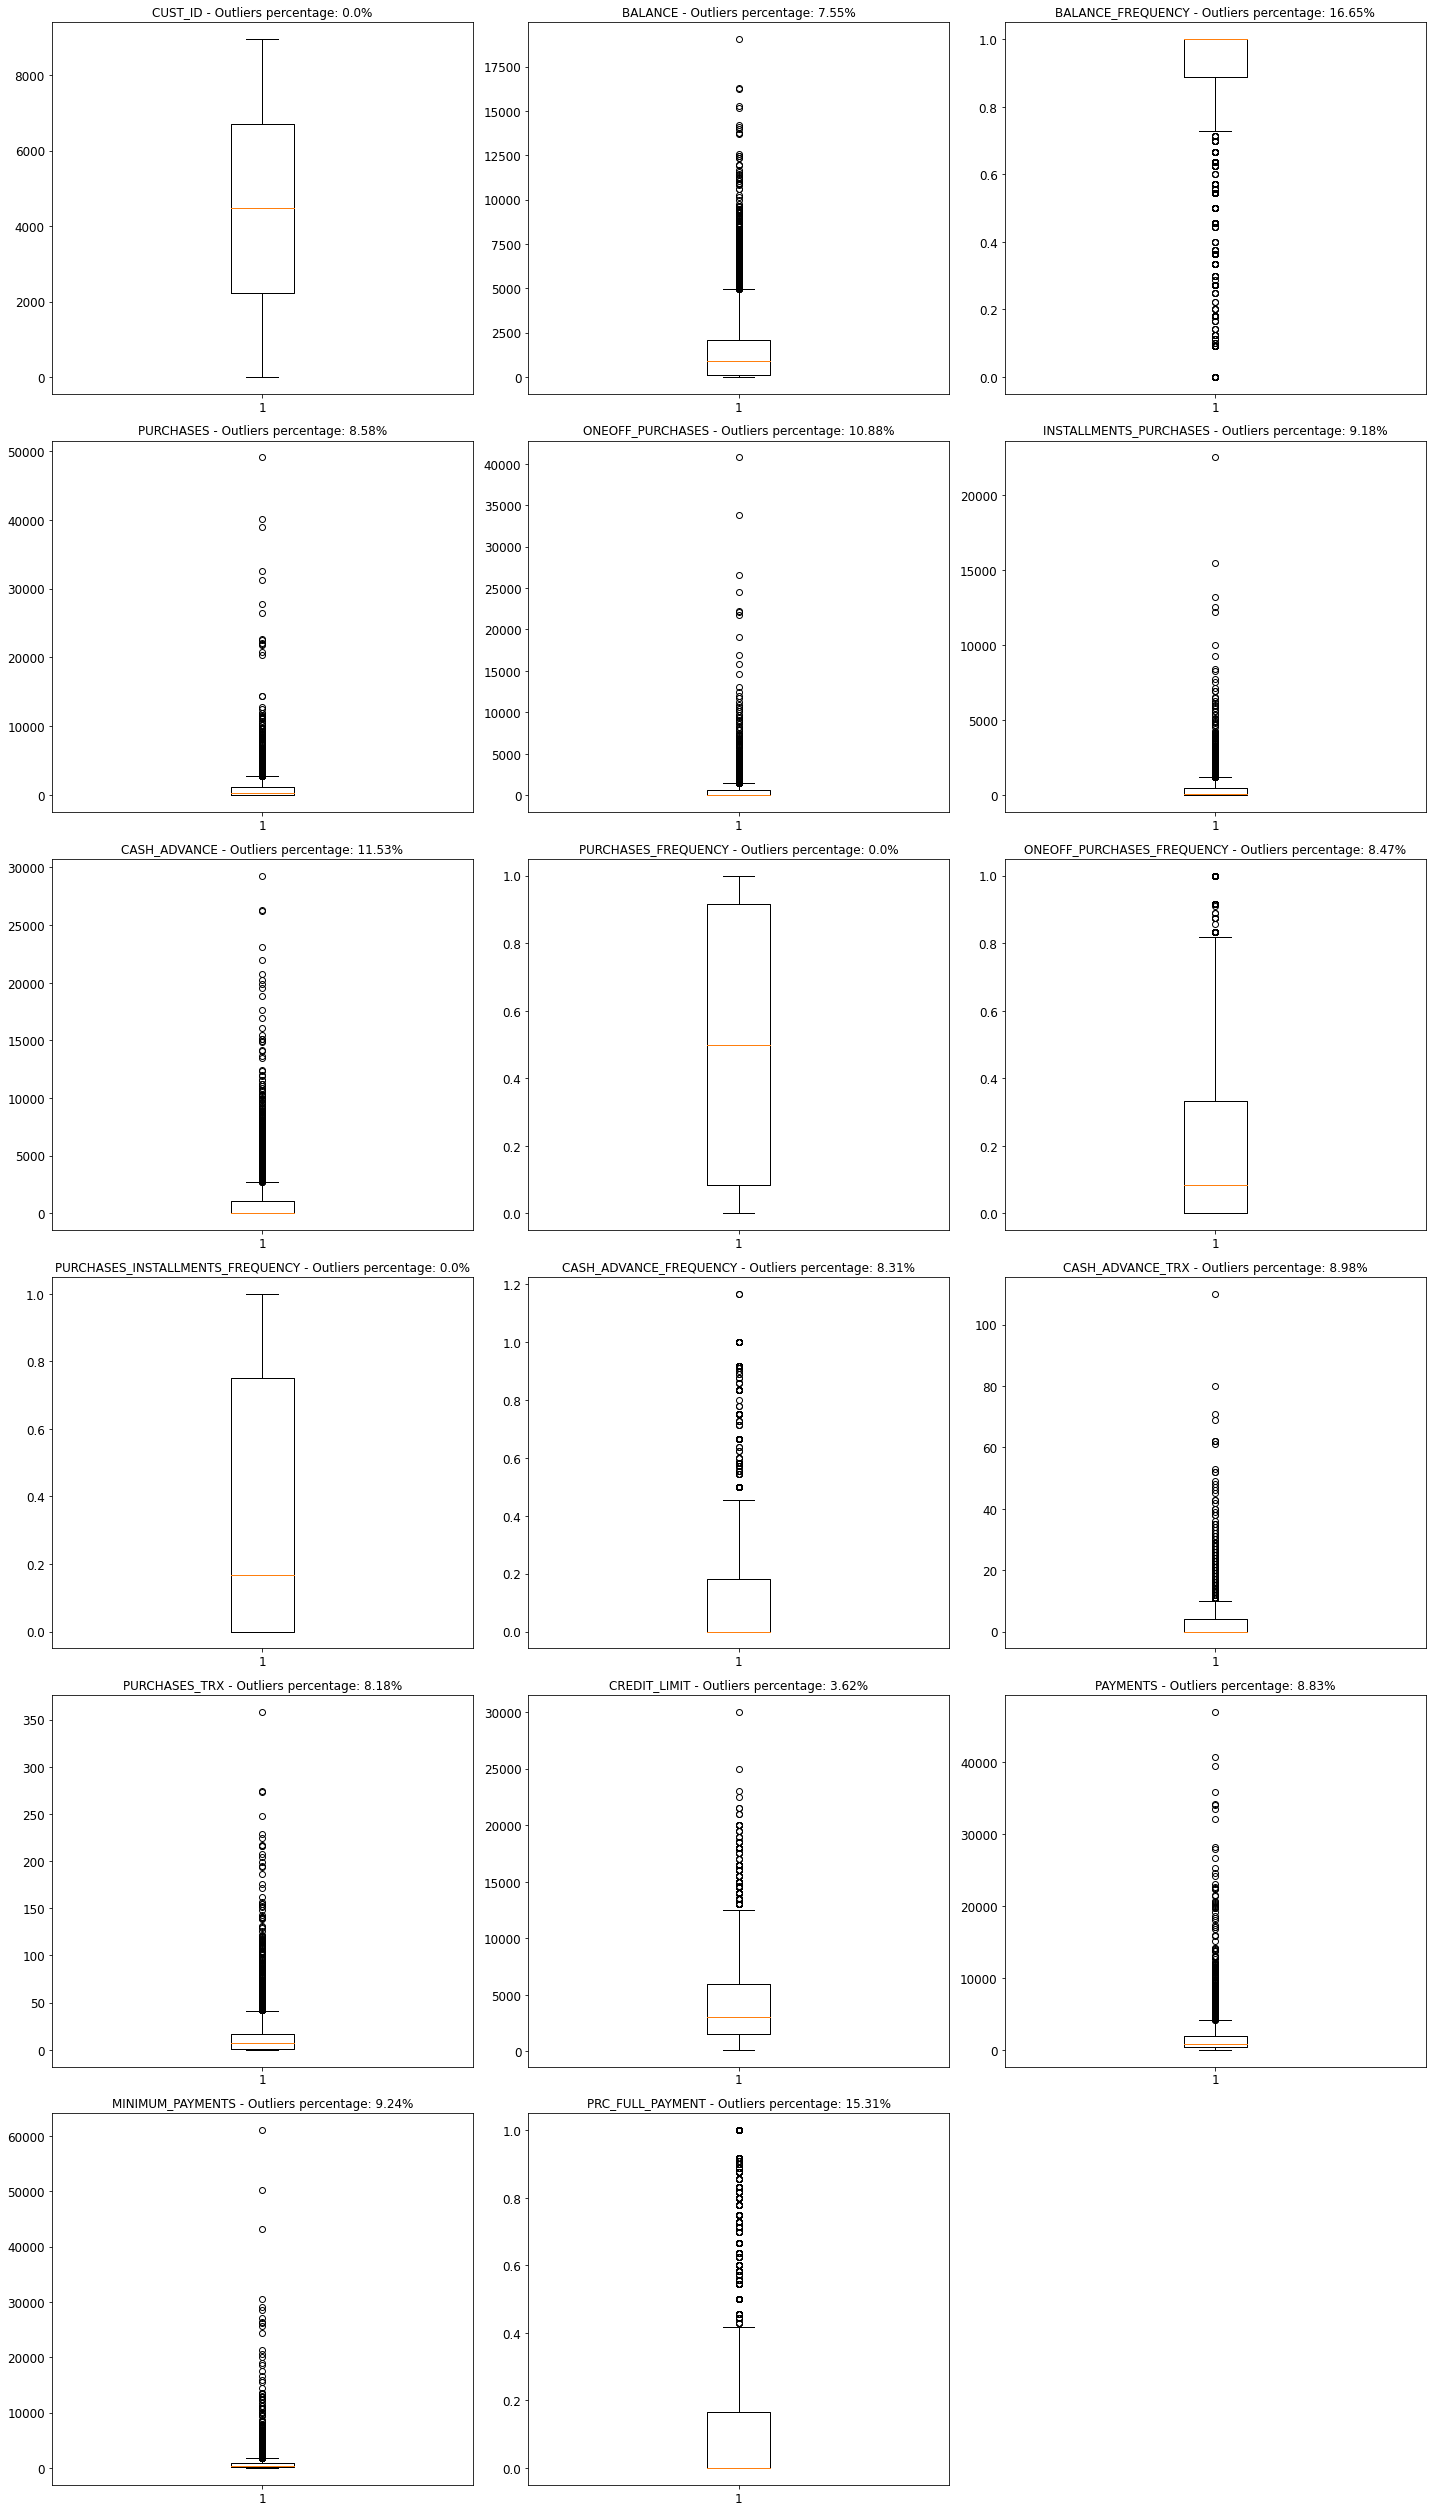

In [ ]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    column = df[num_col[i]].dropna()
    quartile_1, quartile_3 = np.percentile(column, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    # Count the number of outliers in the column
    outliers = df[(df[num_col[i]] < lower_bound) | (df[num_col[i]] > upper_bound)][num_col[i]].count()
    # Calculate the percentage of outliers
    percentage = (outliers / column.count()) * 100
    plt.boxplot(column)
    plt.title(f"{num_col[i]} - Outliers percentage: {round(percentage, 2)}%")

plt.tight_layout()
plt.show()


Membuat Fungsi untuk pengkategorian level skewness pada feature

In [ ]:
def plot_dist(df, num_col):
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    
    # Histogram
    sns.histplot(df[num_col], ax=axes[0], bins=30)
    axes[0].set_title(f"Histogram '{num_col}'")
    axes[0].axvline(df[num_col].mean(), color='red', linestyle='dashed', label='mean')
    axes[0].axvline(df[num_col].median(), color='green', linestyle='dashed', label='median')
    axes[0].legend()
    
    # Boxplot
    sns.boxplot(y=df[num_col], ax=axes[1])
    axes[1].set_title(f"Boxplot '{num_col}'")
    
    plt.show()
    
    # Skewness and Kurtosis
    kurtosis = df[num_col].kurt()
    skewness = df[num_col].skew()
    print(f"{df[num_col].name} Kurtosis: {kurtosis:.2f}")
    print(f"{df[num_col].name} Skewness: {skewness:.2f}")
    
    # Skewness level
    if -0.5 <= skewness <= 0.5:
        skewness_level = "Normal distribution"
    elif 0.5 < skewness <= 1:
        skewness_level = "Moderately skewed to the right"
    elif skewness > 1:
        skewness_level = "Highly skewed to the right"
    elif -1 <= skewness < -0.5:
        skewness_level = "Moderately skewed to the left"
    elif skewness < -1:
        skewness_level = "Highly skewed to the left"
    
    return skewness_level


In [ ]:
df.shape

(4475, 18)

In [ ]:
import pandas as pd

skewness = []
skewness_level = []

for i in range(0, 18):
    col_name = df[num_col[i]].name
    skew = df[num_col[i]].skew()
    
    if -0.5 <= skew <= 0.5:
        level = "Normal distribution"
    elif skew > 0.5 and skew <= 1:
        level = "Moderately skewed to the right"
    elif skew > 1:
        level = "Highly skewed to the right"
    elif skew < -0.5 and skew >= -1:
        level = "Moderately skewed to the left"
    elif skew < -1:
        level = "Highly skewed to the left"
    
    skewness.append(skew)
    skewness_level.append(level)

skewness_df = pd.DataFrame({
    "Column Name": num_col[:20],
    "Skewness": skewness,
    "Skewness Level": skewness_level
})
skewness_df['Skewness Level']

0                Normal distribution
1         Highly skewed to the right
2          Highly skewed to the left
3         Highly skewed to the right
4         Highly skewed to the right
5         Highly skewed to the right
6         Highly skewed to the right
7                Normal distribution
8         Highly skewed to the right
9     Moderately skewed to the right
10        Highly skewed to the right
11        Highly skewed to the right
12        Highly skewed to the right
13        Highly skewed to the right
14        Highly skewed to the right
15        Highly skewed to the right
16        Highly skewed to the right
17         Highly skewed to the left
Name: Skewness Level, dtype: object

###5.1.1 HIGHLY SKEW TO THE RIGHT HANDLING

Data memiliki skewness level terbanyak ada pada Highyly skew to the right sehingga kita handle supaya mengurangi Noise yang ada.

In [ ]:
# create a new dataframe with only normal distribution columns
high_dist_df = skewness_df[skewness_df['Skewness Level'] == 'Highly skewed to the right']
high_dist_df['Column Name']

1                        BALANCE
3                      PURCHASES
4               ONEOFF_PURCHASES
5         INSTALLMENTS_PURCHASES
6                   CASH_ADVANCE
8     ONEOFF_PURCHASES_FREQUENCY
10        CASH_ADVANCE_FREQUENCY
11              CASH_ADVANCE_TRX
12                 PURCHASES_TRX
13                  CREDIT_LIMIT
14                      PAYMENTS
15              MINIMUM_PAYMENTS
16              PRC_FULL_PAYMENT
Name: Column Name, dtype: object

In [ ]:
# define a function to calculate IQR and find outliers
def find_outliers(num_col):
    Q1 = df[num_col].quantile(0.25)
    Q3 = df[num_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[num_col] < lower_bound) | (df_clean[num_col] > upper_bound)]
    return outliers

In [ ]:
# define the columns to apply the function to
cols = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

# apply the function to each column and calculate the number and percentage of outliers
outlier_counts = {}
for col in cols:
    outliers = find_outliers(col)
    outlier_count = outliers.shape[0]
    outlier_percent = outlier_count / df.shape[0] * 100
    outlier_counts[col] = {'Count': outlier_count, 'Percentage': outlier_percent}

# print the results
for col, counts in outlier_counts.items():
    print(f"Outliers in {col}:\nCount: {counts['Count']}, Percentage: {counts['Percentage']:.2f}%\n")


Outliers in BALANCE:
Count: 334, Percentage: 7.46%

Outliers in PURCHASES:
Count: 380, Percentage: 8.49%

Outliers in ONEOFF_PURCHASES:
Count: 481, Percentage: 10.75%

Outliers in INSTALLMENTS_PURCHASES:
Count: 408, Percentage: 9.12%

Outliers in CASH_ADVANCE:
Count: 504, Percentage: 11.26%

Outliers in ONEOFF_PURCHASES_FREQUENCY:
Count: 367, Percentage: 8.20%

Outliers in CASH_ADVANCE_FREQUENCY:
Count: 365, Percentage: 8.16%

Outliers in CASH_ADVANCE_TRX:
Count: 395, Percentage: 8.83%

Outliers in PURCHASES_TRX:
Count: 363, Percentage: 8.11%

Outliers in CREDIT_LIMIT:
Count: 159, Percentage: 3.55%

Outliers in PAYMENTS:
Count: 394, Percentage: 8.80%

Outliers in MINIMUM_PAYMENTS:
Count: 399, Percentage: 8.92%

Outliers in PRC_FULL_PAYMENT:
Count: 685, Percentage: 15.31%



###5.1.1 Highly skew to the right Capping

In [ ]:
#install pip untuk wisorizor
!pip install feature_engine
from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create a Winsorizer object to cap the outliers in multiple columns
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'])

# Fit the Winsorizer object to your data
winsorizer.fit(df_clean)

# Transform the columns to cap the outliers
df_clean = winsorizer.transform(df_clean)

# Calculate the new count and percentage of outliers for each column
outlier_counts = {}
for col in winsorizer.variables:
    col_outliers = df_clean[(df_clean[col] < winsorizer.left_tail_caps_[col]) | (df_clean[col] > winsorizer.right_tail_caps_[col])].shape[0]
    col_percent = col_outliers / df_clean.shape[0] * 100
    outlier_counts[col] = {'Count': col_outliers, 'Percentage': col_percent}

# Print the new count and percentage of outliers for each column
for col, counts in outlier_counts.items():
    print(f"Outliers in {col} after Winsorizing:\nCount: {counts['Count']}, Percentage: {counts['Percentage']:.2f}%\n")


Outliers in BALANCE after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in PURCHASES after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in ONEOFF_PURCHASES after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in INSTALLMENTS_PURCHASES after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in CASH_ADVANCE after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in ONEOFF_PURCHASES_FREQUENCY after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in CASH_ADVANCE_FREQUENCY after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in CASH_ADVANCE_TRX after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in PURCHASES_TRX after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in CREDIT_LIMIT after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in PAYMENTS after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in MINIMUM_PAYMENTS after Winsorizing:
Count: 0, Percentage: 0.00%

Outliers in PRC_FULL_PAYMENT after Winsorizing:
Count: 0, Percentage: 0.00%



#6.FEATURE SELECTION

CUST_ID: fitur ini sebaiknya dihapus karena merupakan sebuah identitas dan tidak memiliki nilai prediktif untuk mengurangi jumlah noise sehingga machine learning lebih mudah belajar.

In [ ]:
num_col

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [ ]:
num_col_sel =['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

#7.FEATURE ENCODING

Mendefinisikan data frame menjadi X tanpa split dikarenakan clustering tidak membutuhkan spliting.

In [ ]:
X = df_clean

##7.1 SCALING MIN MAX

Melakukan Scaling menggunakan Min Max Karena sebaran data masih ada yang tidak normal karena saya capping nilai skewness Highly skew karena level skewness paling banyak pada fitur

In [ ]:
#melakukan MinMaxscaler()
mm_scaler= MinMaxScaler()
X_scaler= mm_scaler.fit_transform(X[num_col_sel])
X_scaler

array([[0.18678169, 0.875     , 0.03668279, ..., 0.22529924, 0.        ,
        0.33333333],
       [0.09134478, 1.        , 0.208344  , ..., 0.08324724, 0.        ,
        0.33333333],
       [0.20855821, 1.        , 0.5164082 , ..., 0.12466085, 0.        ,
        0.33333333],
       ...,
       [0.67035309, 1.        , 0.19978943, ..., 0.48634269, 0.        ,
        0.83333333],
       [0.95818202, 1.        , 0.56838024, ..., 1.        , 0.21818116,
        0.83333333],
       [0.39134693, 1.        , 0.36755443, ..., 0.49987737, 0.21818116,
        0.83333333]])

#8.MODEL TRAINING

##8.1 PCA DIMENSIONAL REDUCTION

Mengecek nilai PCA 11 kolom data dapat merepresentasikan 95% informasi pada data

In [ ]:
df.shape

(4475, 18)

In [ ]:
from sklearn.decomposition import PCA

# create a PCA object
pca = PCA()

# fit the PCA object to the standardized data
pca.fit(X_scaler)

# compute the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# determine the number of principal components that explain at least 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of principal components to keep:", n_components)


Number of principal components to keep: 11


In [ ]:
from sklearn.decomposition import PCA

# Membuat objek PCA dengan komponen utama
pca = PCA(n_components=11)

# Fitting PCA ke data X dan mengubahnya
X_pca = pca.fit_transform(X_scaler)
X_pca

array([[-0.58718687, -0.58649998,  0.25625715, ...,  0.08521106,
        -0.16949154, -0.0442074 ],
       [-0.42507385, -0.55280841,  0.46558506, ...,  0.02249004,
        -0.24896532,  0.08395382],
       [-0.17531029, -0.29002507,  0.8041451 , ..., -0.05827052,
        -0.13241848,  0.21273132],
       ...,
       [-0.04408073,  1.11626903, -0.07803716, ..., -0.13499645,
         0.02158536, -0.2507536 ],
       [-0.29735106,  1.5986295 ,  0.39136154, ..., -0.2015518 ,
         0.44184315,  0.23007672],
       [ 0.0743003 ,  1.05967102, -0.84551088, ...,  0.14797368,
         0.00775422, -0.01008512]])

In [ ]:
# Membuat objek PCA dengan komponen utama
boundaries_pca = PCA(n_components=2)
V_pca = boundaries_pca.fit_transform(X_scaler)

##8.2 OPTIMAL CLUSTER CHECKING

###8.2.1 ELBOW METHOD

- Elbow method Menyarankan untuk menggunakan 3 cluster pada K-means yang dimana pilihan tersebut memiliki perfitungan SSE (Sum of Squared Eror)

In [ ]:
num_col_sel

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

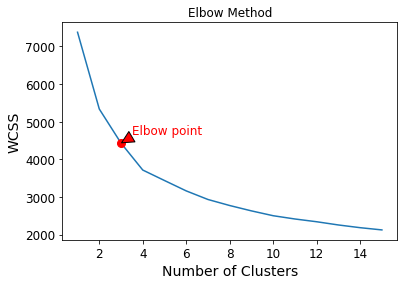

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# add the elbow point to the plot
plt.plot(3, wcss[2], marker='o', markersize=8, color="red")

# add a text label to the elbow point
plt.annotate("Elbow point", xy=(3, wcss[2]), xytext=(3.5, wcss[2] + 250), fontsize=12, color="red",
             arrowprops=dict(facecolor='red', shrink=0.05))

# show the plot
plt.show()


###8.2.2 Shillouete Method

Optimal number of clusters: 2


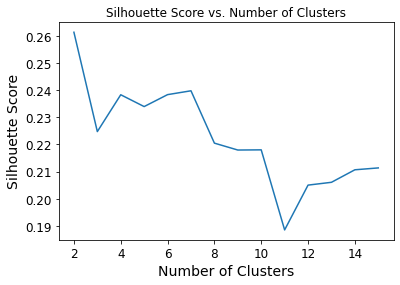

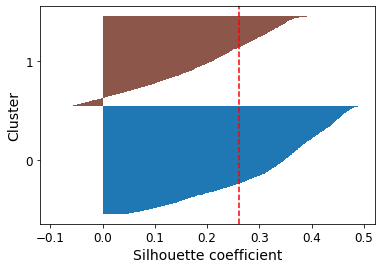

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

# Compute silhouette scores for different numbers of clusters
sil_scores = []
for n_clusters in range(2, 16):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(X_pca)
    score = silhouette_score(X_pca, preds)
    sil_scores.append(score)

# Determine the optimal number of clusters
optimal_n_clusters = np.argmax(sil_scores) + 2
print(f"Optimal number of clusters: {optimal_n_clusters}")

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, 16), sil_scores)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Plot silhouette plot for optimal number of clusters
clusterer = KMeans(n_clusters=optimal_n_clusters, random_state=42)
preds = clusterer.fit_predict(X_pca)
silhouette_vals = silhouette_samples(X_pca, preds)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(np.unique(preds)):
    c_silhouette_vals = silhouette_vals[preds == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = plt.cm.tab20(i / optimal_n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, range(optimal_n_clusters))
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


##8.3.3 K-means Centroid Graph

Untuk bisa mengambil keputusan saya melakukan Cluster Decision Boundaries Untuk melihat sebaran Cluster terbaik setelah melihat sebaran 3 dan 2 cluster saya memutuskan untuk menggunakan 3 cluster saja dengan pertimbangan kita ingin melakukan segmentasi semakin banyak segmentasi yang akurat dalam sudut pandang bisnis lebih baik sehingga kita bisa memberikan pemasaran berdasarkan loyalitas "HIGH","MEDIUM","LOW"

In [ ]:
kmeans.cluster_centers_

array([[ 1.38736128e+00,  7.27652730e-01,  2.90461808e-01,
        -3.74569098e-01, -5.84148363e-02,  1.47092743e-01,
         7.01654818e-02, -6.74075440e-03, -3.38345120e-02,
         1.41729165e-02, -3.09955934e-02],
       [-8.55951180e-01,  1.47223507e-01, -4.10803089e-02,
         1.95040582e-01,  5.08717625e-01, -1.96386546e-05,
         5.70353549e-01, -1.01450259e-01, -4.51145433e-03,
        -9.94106789e-02, -6.47347774e-03],
       [ 2.87849108e-01, -4.02508280e-01, -4.22825508e-01,
        -3.07323319e-01,  1.51088956e-01,  5.55003367e-03,
        -1.76547224e-02,  1.14973712e-01,  1.15011708e-01,
        -1.14484180e-03, -2.00309117e-02],
       [-9.23535140e-01,  8.86143549e-02, -1.31065035e-02,
         5.23507277e-02,  2.06538259e-01,  9.99783505e-02,
        -1.72952071e-01, -6.21266564e-02, -1.13350604e-01,
        -2.22884099e-02, -1.22526586e-02],
       [-6.11655864e-02, -7.62263122e-01,  9.52048761e-02,
         5.10152355e-01, -2.51071595e-01, -1.33384042e-01,
  

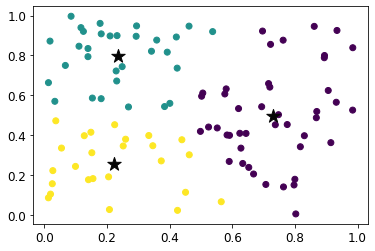

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Generate some sample data
X = np.random.rand(100, 2)

# Fit a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Create a scatter plot of the data points and the centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='#050505')
plt.show()


8.3.4 K-MEANS CLUSTERING METHOD

In [ ]:
# Define number of clusters
n_clusters = 3

# Create an instance of KMeans class
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans model on training data
kmeans.fit(X_pca)

# Predict cluster assignments for test data
cluster_labels = kmeans.predict(X_pca)
cluster_labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
# Convert cluster labels to dataframe
cluster_labels_df = pd.DataFrame({'Cluster': cluster_labels})

# Add cluster labels to original dataframe
df_clustered = pd.concat([df_clean, cluster_labels_df], axis=1)
df_clustered

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,1902.0,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,215.325023,410.484825,0.0,8.0,1.0
3,3426.0,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,258.032630,151.696433,0.0,8.0,1.0
4,3976.0,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1500.0,397.090516,227.143184,0.0,8.0,1.0
5,4266.0,2237.238086,1.000,120.0,120.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,2500.0,343.102984,712.986387,0.0,8.0,1.0
7,4680.0,424.994385,0.375,1200.0,1200.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1200.0,57.266292,56.720210,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


##8.4 EXPLORATORY DATA ANALYSIS PADA CLUSTER

#9.EKSPLORASI DATA ANTARA CLUSTER_0 DAN CLUSTER_1

In [ ]:
#Informasi Data All Fitur
df_clustered.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000
mean,4474.638554,1425.787520,0.895236,761.196445,366.687291,312.077764,662.822301,0.495675,0.195146,0.369805,0.130353,2.407785,11.773865,4446.326752,1387.792304,572.935793,0.102026,11.531511,1.020621
std,2589.259871,1552.298895,0.206730,900.428473,528.324130,418.013267,990.309500,0.399564,0.273709,0.398217,0.181696,3.434549,13.020452,3424.848862,1277.080759,556.021588,0.160012,1.324580,0.718432
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,4.841543,0.037744,0.000000,6.000000,0.000000
25%,2241.500000,152.877191,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,427.905948,169.878606,0.000000,12.000000,1.000000
50%,4475.000000,916.693628,1.000000,379.300000,35.955000,95.845000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,874.442322,309.983200,0.000000,12.000000,1.000000
75%,6712.500000,2112.447004,1.000000,1149.940000,600.000000,498.592500,1110.248526,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1954.888216,830.656813,0.166667,12.000000,2.000000
max,8950.000000,5051.801722,1.000000,2807.856250,1500.000000,1246.481250,2775.621316,1.000000,0.833333,1.000000,0.625000,10.000000,41.000000,14000.000000,4245.361617,1821.824123,0.416668,12.000000,2.000000


In [ ]:
#Insight all Segment
df_clustered.groupby('Cluster').mean()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,,
0.0,4476.899135,1179.863876,0.923952,1022.941384,446.940836,459.201700,374.565639,0.681673,0.253605,0.555284,0.068184,1.275696,17.248799,4572.076675,1434.628093,500.669204,0.133153,11.629203
1.0,4437.630261,1125.770304,0.857749,766.380537,370.275997,311.981240,354.724420,0.507974,0.194019,0.372631,0.065880,1.175351,11.587675,4294.681029,1240.571596,494.215964,0.116379,11.588176
2.0,4567.023214,2033.760986,0.924180,541.802930,300.000366,190.571423,1315.870534,0.323670,0.147640,0.213095,0.262758,4.851786,7.555357,4531.456349,1523.000842,740.269512,0.053913,11.312500


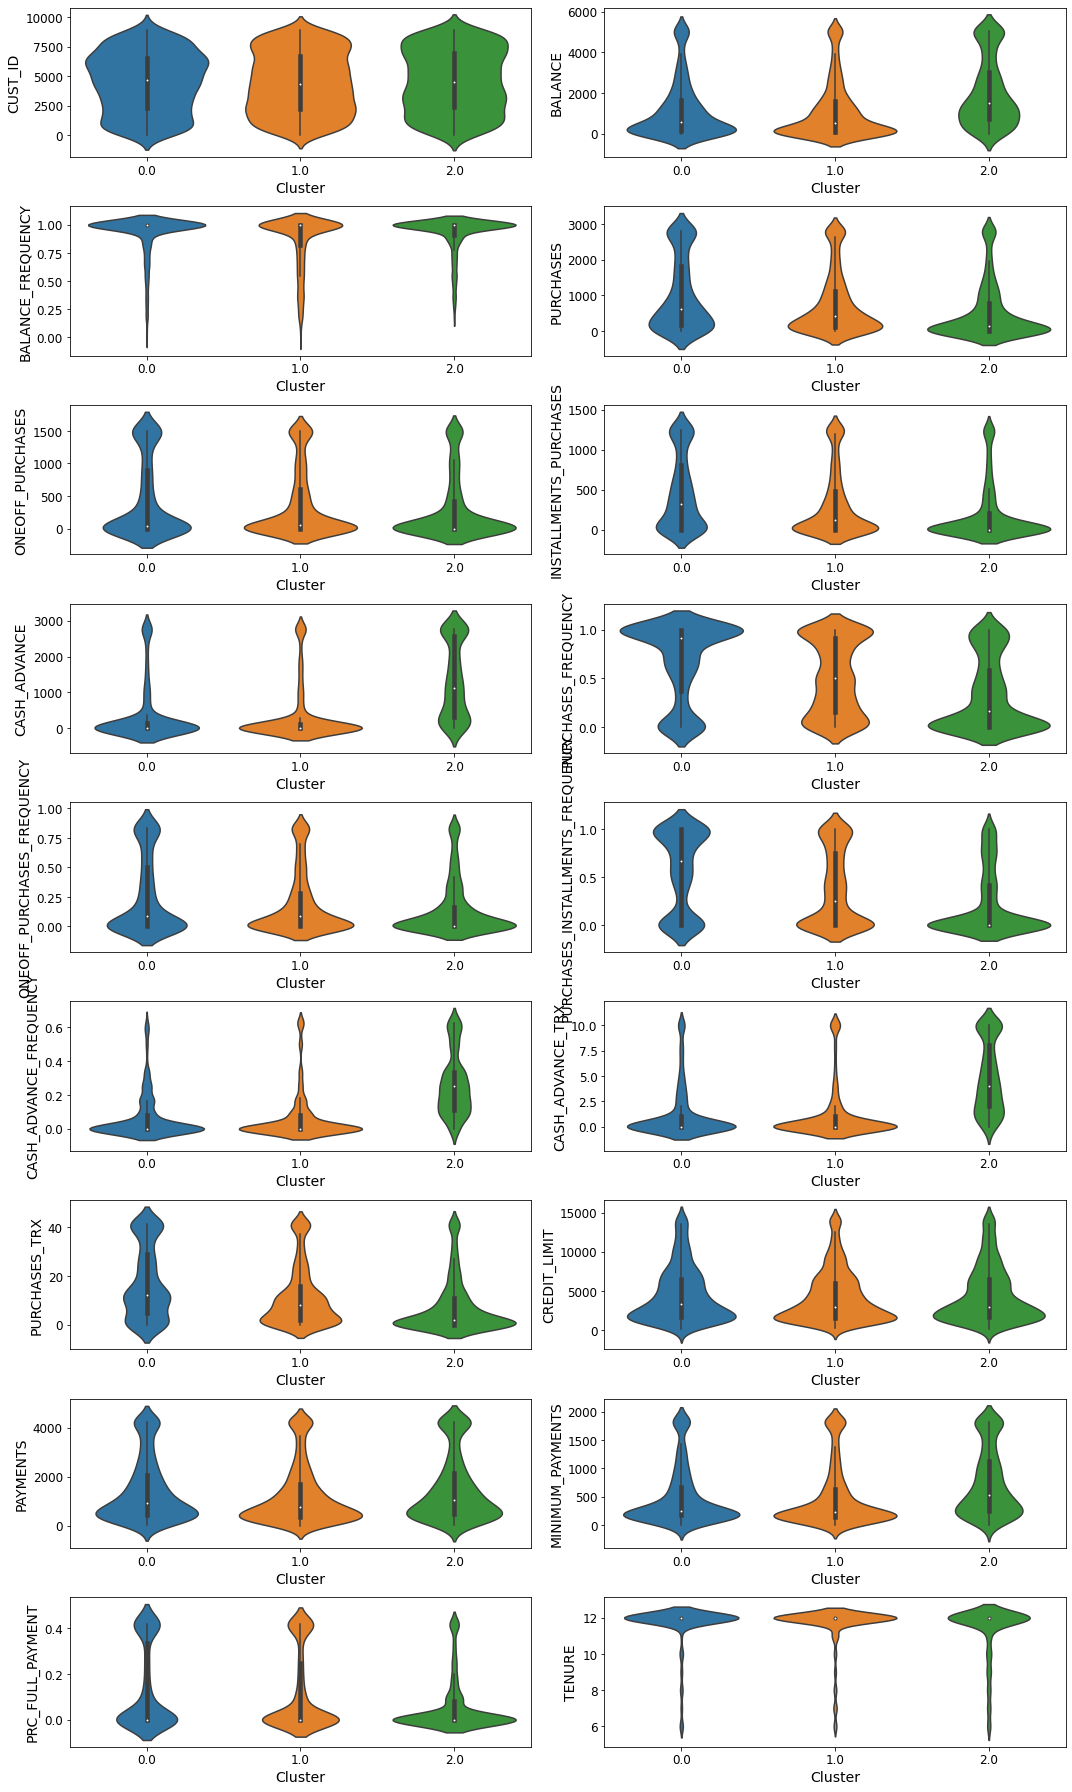

In [ ]:
#Plot graphik sebaran data cluster dan masing - masing fitur
fig, axes = plt.subplots(9, 2, figsize=(15,25))   

axes = axes.flatten()

for ax, col in zip(axes, df_clustered[:17]):
    _ = sns.violinplot(x=df_clustered["Cluster"], y=df_clustered[col], ax=ax,font_scale=500000)
    plt.tight_layout()

#9.1KESIMPULAN HASIL CLUSTER

- Cluster 0 memiliki balance dan credit limit tertinggi, mengindikasikan cluster 0 adalah pemilik kapasita financial yang tinggi dan Purchase frequency yang saya sebut sebagai 'HIGH LEVEL SPENDER'.

- Cluster 1 memiliki balance dan credit limit lebih rendah dari cluster 1 dan memiliki lower number purchase dibandingkan dengan Cluster 0 dapat disebut sebagai 'MEDIUM LEVEL CUSTOMER'.

- Cluster 2 memiliki balance dan credit limit terendah, memiliki nilai purchase yang rendah memiliki kesulitan ekonomi sehingga dapat disebut sebagai 'LOW LEVEL CUSTOMER'

#10.SAVE MODEL

In [ ]:
import joblib

with open('kmeans_gc4_selasa.pkl', 'wb') as file_1:
    joblib.dump(kmeans, file_1)

with open('model_scaler_gc4.pkl', 'wb') as file_2:
    joblib.dump(mm_scaler, file_2)

with open('mode_pca_gc4.pkl', 'wb') as file_3:
    joblib.dump(pca, file_3)

with open('list_num_col_sel_gc4_selasa.txt', 'wb') as file_4:
    joblib.dump(num_col_sel, file_4)

#11.LOAD FILE SAMPLE CSV FOR MODEL INFERENCE

In [ ]:
#melakukan download file csv untuk digunakan pada inference
df_sample.to_csv('sample_data.csv', index=False)

#12.MODEL OVERVIEW



- Penulis menggunakan PCA untuk melakukan perampingan informasi pada data dengan tujuan untuk mengurangi dimensi atau fitur agar model Kmeans berjalan dengan optimal.
- Menggunakan Elbow Method untuk evaluasi segmentasi/ cluster terbaik
- Menggunakan Siluet Method untuk evaluasi segmentasi, cluster terbaik
- Diketahui dari hasil elbow menyarankan 3 kluster dan siluet 3 kluster 
- Saya memutuskan untuk menggunakan 3 kluster untuk membaginya menjadi 3 Segmentasi supaya perusahaan bisa lebih fokus melakukan pemasaran yang lebih tepat sasaran

##6.KONSEPTUAL

PERTANYAAN

1.Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2.Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3.Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

JAWAB

1.-K-means clustering adalah salah satu algoritma unsupervised learning yang termasuk ke dalam analisis klaster (cluster analysis) non hirarki yang digunakan untuk  mengelompokkan  data berdasarkan variabel atau feature.

2.-Inertia adalah  jarak centroid dengan data sekitarnya, dalam kasus elbow method nilai inertia adalah titik poin dimana penurunan titik ke titik lainnya menurun secara signifikan semakin turun dengan jarak yang jauh semakin baik.

2.Elbow method adalah teknik yang digunakan untuk melakukan clustering. Method ini  berdasarkan value k di dalam within-cluster sum of sqare (WCSS) mulai mengalami penuruan yang tinggi dan pelan pelan menurun.

Kelebihannya adalah kodingannya mudah dan visualnya mudah dimengerti
Kekurangannya adalah sulit untuk membedakan pada elbow yang mana behentinya mulai melemah

